In [1]:
import pandas as pd
from PIL import Image
import seaborn as sns

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


Text(0.5, 1.0, 'Пропущенные значения в таблице')

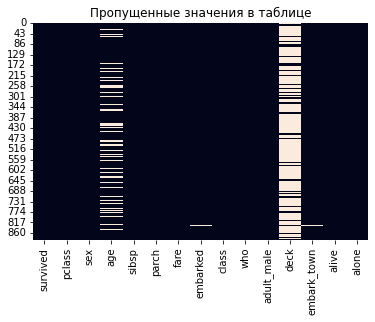

In [4]:
sns.heatmap(titanic.isnull(), cbar = False).set_title("Пропущенные значения в таблице")

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


**Переводим** все нужные значения **в целочисленные**

In [6]:
sex_display = {'male': 0, 'female': 1}
titanic['sex'] = titanic['sex'].map(sex_display)

In [7]:
who_display = {'man': 0, 'woman': 1, 'child': 2}
titanic['who'] = titanic['who'].map(who_display)

In [8]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,0,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,1,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,1,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,First,1,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,Third,0,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,Second,0,True,NaN,Southampton,no,True
887,1,1,1,19.0,0,0,30.0000,S,First,1,False,B,Southampton,yes,True
888,0,3,1,NaN,1,2,23.4500,S,Third,1,False,NaN,Southampton,no,False
889,1,1,0,26.0,0,0,30.0000,C,First,0,True,C,Cherbourg,yes,True


По столбцу ***sex*** и ***adult_male*** найдем медиану трех значений (дети, женщины, мужчины) и по найденным значениям *заполним пропущенные поля*

In [9]:
titanic.groupby(['who'])['age'].median()

who
0    30.0
1    30.0
2     5.0
Name: age, dtype: float64

In [10]:
titanic['age'].fillna(titanic.groupby(['who'])['age'].transform('median'), inplace=True)

In [11]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,0,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,1,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,1,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,First,1,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,Third,0,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,Second,0,True,NaN,Southampton,no,True
887,1,1,1,19.0,0,0,30.0000,S,First,1,False,B,Southampton,yes,True
888,0,3,1,30.0,1,2,23.4500,S,Third,1,False,NaN,Southampton,no,False
889,1,1,0,26.0,0,0,30.0000,C,First,0,True,C,Cherbourg,yes,True


In [12]:
titanic['age'].describe()

count    891.000000
mean      29.758889
std       13.002570
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

Построим графики **какой класс в каком городе зашел на борт**

<AxesSubplot:>

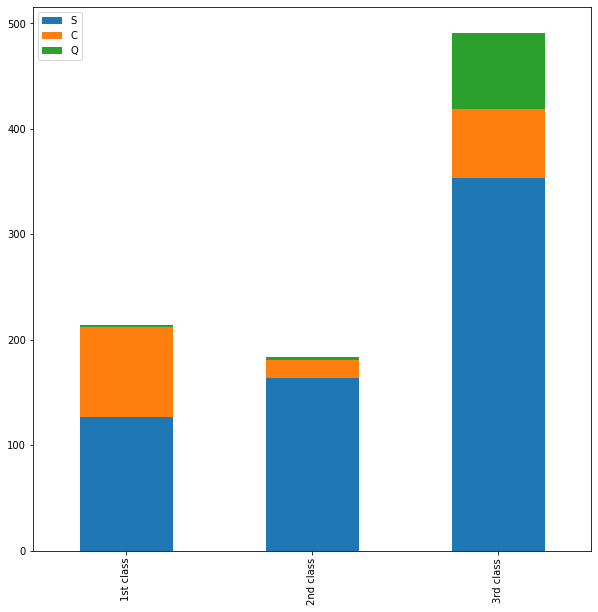

In [13]:
Pclass1 = titanic[titanic['pclass'] == 1]['embarked'].value_counts()
Pclass2 = titanic[titanic['pclass'] == 2]['embarked'].value_counts()
Pclass3 = titanic[titanic['pclass'] == 3]['embarked'].value_counts()
pc = pd.DataFrame([Pclass1, Pclass2, Pclass3])
pc.index = ['1st class', '2nd class', '3rd class']
pc.plot(kind='bar', stacked=True, figsize=(10,10))

И найдем пропущенные значения в ***embarked***, которые совпадают с пропущенными значениями в  ***embark_town*** (первая буква embark_town = embarked)

In [14]:
titanic[pd.isna(titanic['embarked'])]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,1,38.0,0,0,80.0,NaN,First,1,False,B,NaN,yes,True
829,1,1,1,62.0,0,0,80.0,NaN,First,1,False,B,NaN,yes,True


Как мы видим, оба пропущенных значения имеют **1й класс**, в котором мода равна ***Southampton*** (см. график выше)

Поэтому заполним пропущенные поля модой этих столбцов: ***S*** и ***Southampton*** соответственно

In [15]:
titanic.embarked.fillna(titanic[titanic['pclass'] == 1]['embarked'].mode()[0], inplace=True)
titanic.embark_town.fillna(titanic[titanic['pclass'] == 1]['embark_town'].mode()[0], inplace = True)

In [16]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,0,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,1,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,1,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,First,1,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,Third,0,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,Second,0,True,NaN,Southampton,no,True
887,1,1,1,19.0,0,0,30.0000,S,First,1,False,B,Southampton,yes,True
888,0,3,1,30.0,1,2,23.4500,S,Third,1,False,NaN,Southampton,no,False
889,1,1,0,26.0,0,0,30.0000,C,First,0,True,C,Cherbourg,yes,True


In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int64  
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    int64  
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  891 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(6), object(5)
memory usage: 92.4+ KB


Как мы видим, пустые поля остались только в столбце ***deck***

<AxesSubplot:>

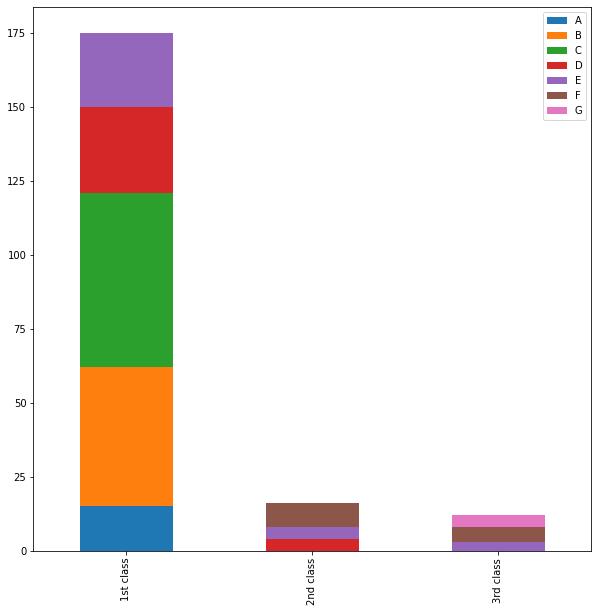

In [18]:
Pclass1 = titanic[titanic['pclass'] == 1]['deck'].value_counts().sort_index()
Pclass2 = titanic[titanic['pclass'] == 2]['deck'].value_counts().sort_index()
Pclass3 = titanic[titanic['pclass'] == 3]['deck'].value_counts().sort_index()
pc = pd.DataFrame([Pclass1, Pclass2, Pclass3])
pc.index = ['1st class', '2nd class', '3rd class']
pc.plot(kind='bar', stacked=True, figsize=(10,10))

Как мы видим, во **втором** и **третьем** классах совершенно отсутствуют каюты **с А по С**

Переопределим все **символьные** значения **в целочисленные**

In [19]:
deck_display = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}

titanic['deck'] = titanic['deck'].map(deck_display)

И найдем **медиану** значений в ***deck*** в зависимости от **класса пассажира**

In [20]:
titanic.groupby('pclass')['deck'].median()

pclass
1    3.0
2    5.5
3    6.0
Name: deck, dtype: float64

Запишем в пропущенные ячейки **медиану** того класса, к которому принадлежит пассажир

In [21]:
titanic['deck'].fillna(titanic.groupby('pclass')['deck'].transform('median'), inplace=True)

И построим **график распределения кают по классам**

<AxesSubplot:>

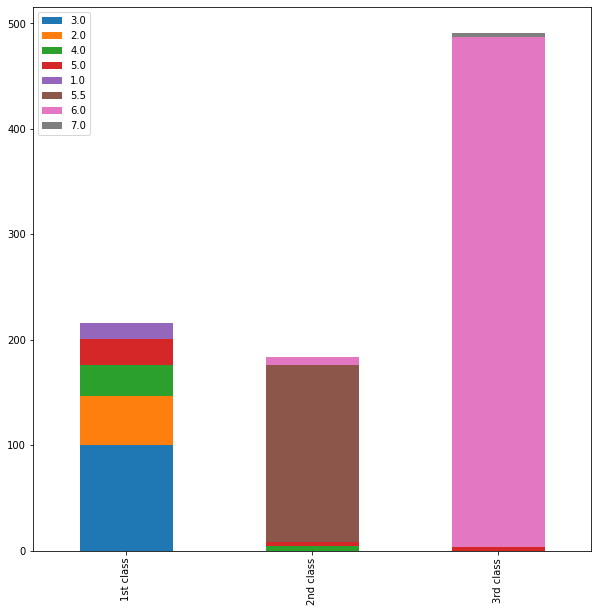

In [22]:
Pclass1 = titanic[titanic['pclass'] == 1]['deck'].value_counts()
Pclass2 = titanic[titanic['pclass'] == 2]['deck'].value_counts()
Pclass3 = titanic[titanic['pclass'] == 3]['deck'].value_counts()
pc = pd.DataFrame([Pclass1, Pclass2, Pclass3])
pc.index = ['1st class', '2nd class', '3rd class']
pc.plot(kind='bar', stacked=True, figsize=(10,10))

#### Все пустые поля заполнены!
---

## Ответы на вопросы
### 1. Кого больше среди пассажиров — мужчин или женщин?
Если под "мужчиной" подразумевается человек мужского пола,а под "женщиной" - человек женского пола, то:

In [23]:
titanic.value_counts('sex')

sex
0    577
1    314
dtype: int64

<AxesSubplot:>

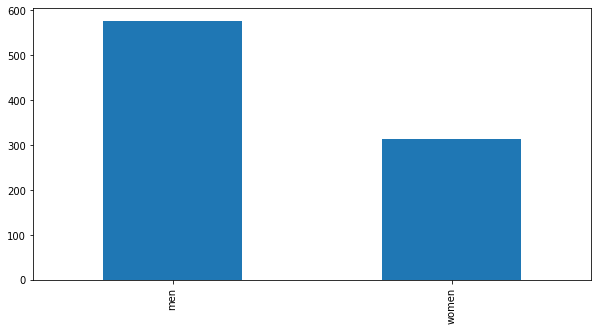

In [24]:
count_sex = pd.DataFrame([titanic.value_counts('sex')[0], titanic.value_counts('sex')[1]])
count_sex.index = ['men', 'women']
count_sex.plot(kind='bar', figsize=(10,5), legend=None)

Как мы видим, мужского пола **больше**, чем женского

### 2. Каков процент взрослых мужчин от всех пассажиров?


In [25]:
print("ОТВЕТ:", "%.3f" % (titanic[titanic['adult_male']].count()[0] * 100 / titanic['survived'].count()) + " %")

ОТВЕТ: 60.269 %


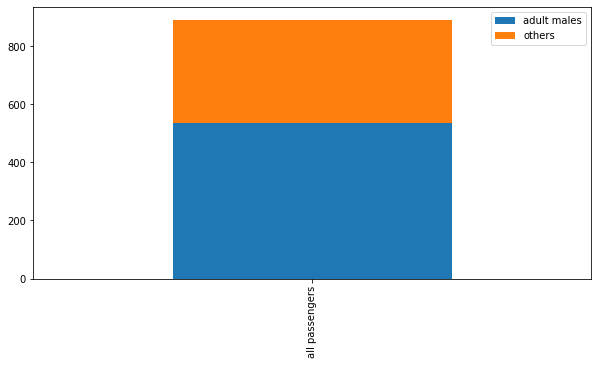

In [26]:
count_adult = pd.DataFrame([titanic['adult_male'].value_counts()])
count_adult.index = ['all passengers']
count_adult.plot(kind='bar', stacked=True, figsize=(10,5)).legend(['adult males', 'others'])

### 3. Сколько людей в каждом классе?


In [27]:
first_class = titanic[titanic['pclass'] == 1]['pclass'].count()
second_class = titanic[titanic['pclass'] == 2]['pclass'].count()
third_class = titanic[titanic['pclass'] == 3]['pclass'].count()

print(f"1й класс: {first_class} чел. \n2й класс: {second_class} чел. \n3й класс: {third_class} чел. \n")

1й класс: 216 чел. 
2й класс: 184 чел. 
3й класс: 491 чел. 



<AxesSubplot:>

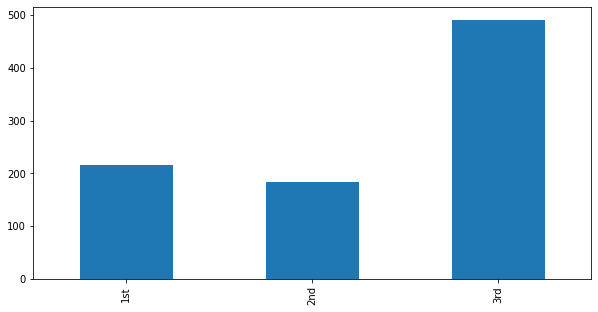

In [28]:
classes = pd.DataFrame([first_class, second_class, third_class])
classes.index = ['1st', '2nd', '3rd']
classes.plot(kind='bar', figsize=(10,5), legend=None)

---

## Признаки

In [29]:
titanic.describe()

,survived,pclass,sex,age,sibsp,parch,fare,who,deck
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.758889,0.523008,0.381594,32.204208,0.490460,5.168350
std,0.486592,0.836071,0.477990,13.002570,1.102743,0.806057,49.693429,0.660838,1.349468
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,5.000000
50%,0.000000,3.000000,0.000000,30.000000,0.000000,0.000000,14.454200,0.000000,6.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,6.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,7.000000


**1. СРЕДНИЙ ВОЗРАСТ СРЕДИ ВЫЖИВШИХ**

In [30]:
print("ОТВЕТ:", "%.3f лет" % titanic.groupby('survived')['age'].mean()[1])

ОТВЕТ: 28.596 лет


**2. ПРОЦЕНТ ПОГИБШИХ ОТНОСИТЕЛЬНО КОЛИЧЕСТВА ВСЕХ ПАССАЖИРОВ**

In [31]:
print("ОТВЕТ:", "%.3f" % (titanic[titanic['survived'] == 0]['survived'].count() * 100 / titanic['survived'].count()) + " %")

ОТВЕТ: 61.616 %


Как мы видим, **больше 60% умерли**

**3. ВЕРОЯТНОСТЬ ВЫЖИВАНИЯ ОТНОСИТЕЛЬНО КЛАССА**

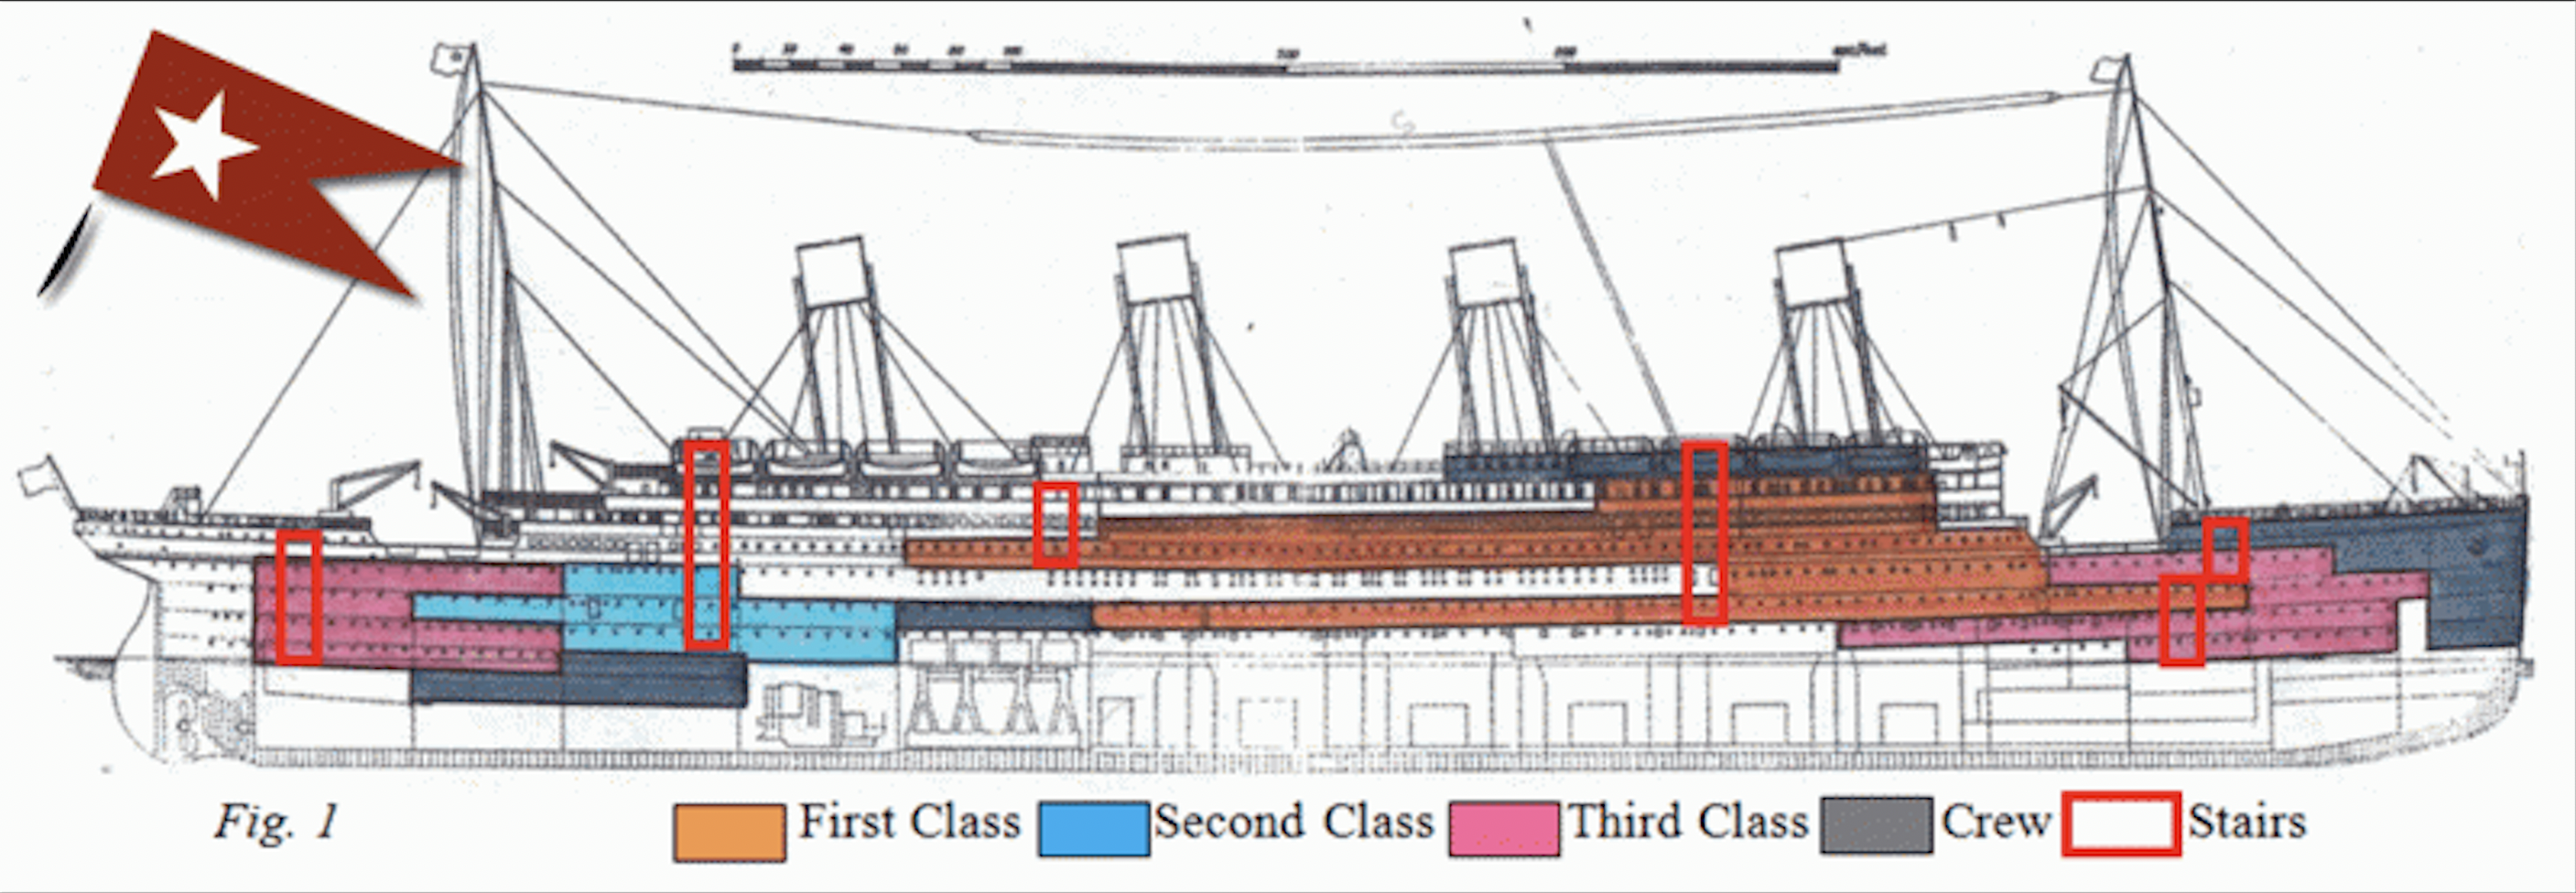

In [32]:
Image.open("titanic_classes.png")

Так как удар пришелся на нос корабля, в котором находился 3 класс, вероятность *выжить* у людей из третьего класс была *минимальной*

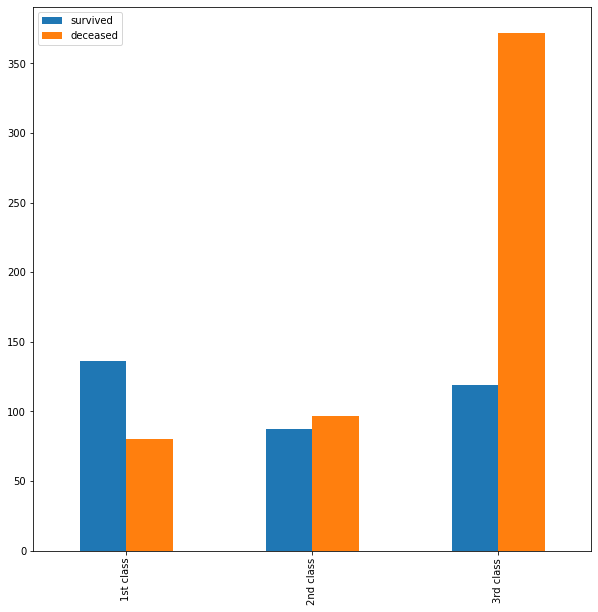

In [33]:
Pclass1 = titanic[titanic['pclass'] == 1]['survived'].value_counts()
Pclass2 = titanic[titanic['pclass'] == 2]['survived'].value_counts()
Pclass3 = titanic[titanic['pclass'] == 3]['survived'].value_counts()
pc = pd.DataFrame([Pclass1, Pclass2, Pclass3])
pc.index = ['1st class', '2nd class', '3rd class']
pc.plot(kind='bar', stacked=False, figsize=(10,10)).legend(['survived', 'deceased'])

In [34]:
print("ОТВЕТ:", "Погибло %.3f" % (Pclass1[0] * 100 / Pclass1.sum()) + "% людей из 1го класса", "Погибло %.3f" % (Pclass2[0] * 100 / Pclass2.sum()) + "% людей из 2го класса", "Погибло %.3f" % (Pclass3[0] * 100 / Pclass3.sum()) + "% людей из 3го класса", sep='\n')

ОТВЕТ:
Погибло 37.037% людей из 1го класса
Погибло 52.717% людей из 2го класса
Погибло 75.764% людей из 3го класса


Больше всего погибших как раз в *3м классе*

**4. ВЕРОЯТНОСТЬ ВЫЖИВАНИЯ ОТНОСИТЕЛЬНО СТОИМОСТИ БИЛЕТА**

In [35]:
titanic['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

Разделим стоимость билета на **4 категории**:
- Cheap (<7.9)

- Mid (>7.9 & <14.45)

- Under_Mid(>14.45 & <31)

- Expensive (>31)

In [36]:
Fare1 = titanic[titanic['fare'] <= 7.9]['survived'].value_counts()
Fare2 = titanic[(titanic['fare'] > 7.9) & (titanic['fare'] <=14.45)]['survived'].value_counts()
Fare3 = titanic[(titanic['fare'] >= 14.45) & (titanic['fare'] <= 31.0)]['survived'].value_counts()
Fare4 = titanic[titanic['fare'] > 31.0]['survived'].value_counts()

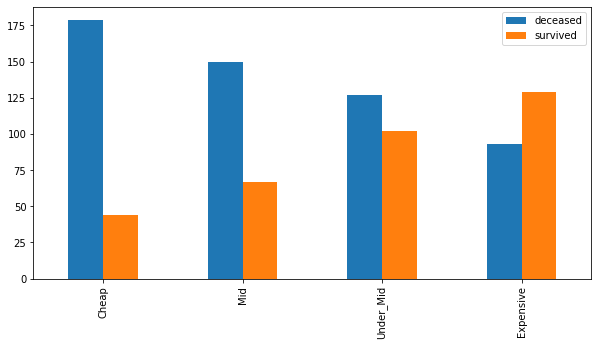

In [37]:
Fr = pd.DataFrame([Fare1, Fare2, Fare3, Fare4])
Fr.index = ['Cheap','Mid', 'Under_Mid','Expensive']
Fr.plot(kind='bar', figsize=(10,5)).legend(['deceased', 'survived'])

In [38]:
print("ОТВЕТ:", "Погибло %.3f" % (Fare1[0] * 100 / Fare1.sum()) + "% людей с дешевыми билетами", "Погибло %.3f" % (Fare2[0] * 100 / Fare2.sum()) + "% людей с билетами средней цены", "Погибло %.3f" % (Fare3[0] * 100 / Fare3.sum()) + "% людей с билетами выше средней цены", "Погибло %.3f" % (Fare4[0] * 100 / Fare4.sum()) + "% людей с самыми дорогими билетами", sep='\n')

ОТВЕТ:
Погибло 80.269% людей с дешевыми билетами
Погибло 69.124% людей с билетами средней цены
Погибло 55.459% людей с билетами выше средней цены
Погибло 41.892% людей с самыми дорогими билетами


Как мы видим, чем **дороже** был билет, тем **выше** был шанс выжить

**5. ВЕРОЯТНОСТЬ ВЫЖИВАНИЯ ОТНОСИТЕЛЬНО ГОРОДА ПОСАДКИ**

In [39]:
titanic['embark_town'].describe()

count             891
unique              3
top       Southampton
freq              646
Name: embark_town, dtype: object

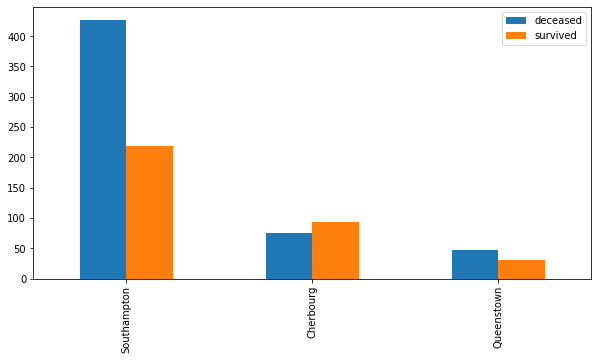

In [40]:
S_town = titanic[titanic['embark_town'] == 'Southampton']['survived'].value_counts()
C_town = titanic[titanic['embark_town'] == 'Cherbourg']['survived'].value_counts()
Q_town = titanic[titanic['embark_town'] == 'Queenstown']['survived'].value_counts()
towns = pd.DataFrame([S_town, C_town, Q_town])
towns.index = ['Southampton', 'Cherbourg', 'Queenstown']
towns.plot(kind='bar', figsize=(10,5)).legend(['deceased', 'survived'])

In [41]:
print("ОТВЕТ:", "Погибло %.3f" % (titanic[titanic['embark_town'] == 'Southampton']['survived'].value_counts()[0] * 100 / titanic[titanic['embark_town'] == 'Southampton']['survived'].value_counts().sum()) + "%, севших в Southampton", "Погибло %.3f" % (titanic[titanic['embark_town'] == 'Cherbourg']['survived'].value_counts()[0] * 100 / titanic[titanic['embark_town'] == 'Cherbourg']['survived'].value_counts().sum()) + "%, севших в Cherbourg", "Погибло %.3f" % (titanic[titanic['embark_town'] == 'Queenstown']['survived'].value_counts()[0] * 100 / titanic[titanic['embark_town'] == 'Queenstown']['survived'].value_counts().sum()) + "%, севших в Queenstown", sep='\n')

ОТВЕТ:
Погибло 66.099%, севших в Southampton
Погибло 44.643%, севших в Cherbourg
Погибло 61.039%, севших в Queenstown


Можно заметить, что **самые высокие шансы выжить** были у людей, которые сели в **Cherbourg**

**6. ВЕРОЯТНОСТЬ ВЫЖИВАНИЯ ОТНОСИТЕЛЬНО ПОЛА**

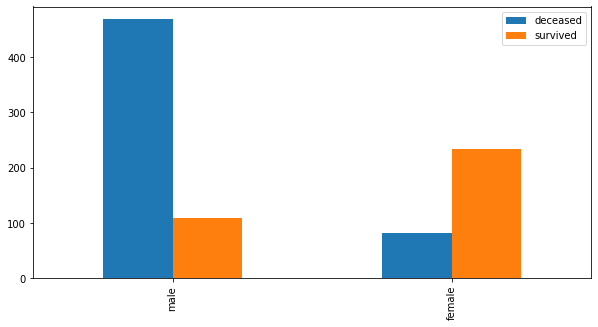

In [42]:
male = titanic[titanic['sex'] == 0]['survived'].value_counts()
female = titanic[titanic['sex'] == 1]['survived'].value_counts()
sexs = pd.DataFrame([male, female])
sexs.index = ['male', 'female']
sexs.plot(kind='bar', figsize=(10,5)).legend(['deceased', 'survived'])

In [43]:
print("ОТВЕТ:", "Погибло %.3f" % (titanic[titanic['sex'] == 0]['survived'].value_counts()[0] * 100 / titanic[titanic['sex'] == 0]['survived'].value_counts().sum()) + "% мужчин", "Погибло %.3f" % (titanic[titanic['sex'] == 1]['survived'].value_counts()[0] * 100 / titanic[titanic['sex'] == 1]['survived'].value_counts().sum()) + "% женщин", sep='\n')

ОТВЕТ:
Погибло 81.109% мужчин
Погибло 25.796% женщин


**7. РОДСТВЕННИКИ**

Создадим новый столбец **family**, куда запишем количество всех родственников на борту (братья/сестры + родители/дети)

In [44]:
titanic['family'] = titanic['parch'] + titanic['sibsp']

Построим **график выживших и погибших** относительно числа их родственников

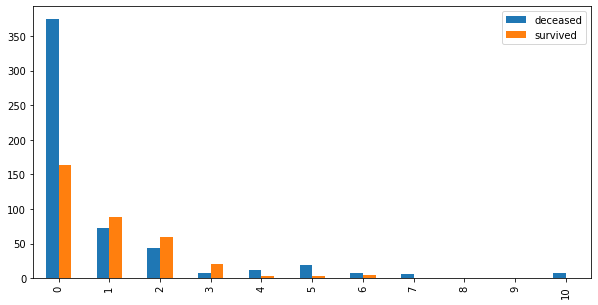

In [45]:
rel = []
for i in range(11):
    rel.append(titanic[titanic['family'] == i]['survived'].value_counts().sort_index())

fam = pd.DataFrame(rel)
fam.index = [str(i) for i in range(titanic['family'].max() + 1)]
fam.plot(kind='bar', figsize=(10,5)).legend(['deceased', 'survived'])

Как мы видим, **больше всего** пассажиров, которые путешествовали **в одиночку**
А именно:

In [46]:
print('{:.3f}% от всего количества пассажиров путешествовали в одиночку'.format(titanic[titanic['family'] == 0]['family'].count() * 100 / titanic['family'].count()))

60.269% от всего количества пассажиров путешествовали в одиночку


---

## Только выжившие пассажиры

Создаем копию исходной таблицы, **взяв только выживших**

In [47]:
alive = titanic[titanic['survived'] == 1].copy()

alive.to_csv("alive.csv", index=False)

In [48]:
survives = pd.read_csv("alive.csv")

Найдем процент **взрослых мужчин** среди выживших

In [49]:
print("ОТВЕТ:", "%.3f" % (survives[survives['adult_male']].count()[0] * 100 / survives['survived'].count()) + " %")

ОТВЕТ: 25.731 %


Процент уменьшился **более чем в 2 раза**

In [50]:
survives.describe()

,survived,pclass,sex,age,sibsp,parch,fare,who,deck,family
count,342.0,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,1.0,1.950292,0.681287,28.595526,0.473684,0.464912,48.395408,0.885965,4.695906,0.938596
std,0.0,0.863321,0.466660,13.776751,0.708688,0.771712,66.596998,0.623472,1.516163,1.186076
min,1.0,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.0,1.000000,0.000000,21.000000,0.000000,0.000000,12.475000,0.000000,3.000000,0.000000
50%,1.0,2.000000,1.000000,30.000000,0.000000,0.000000,26.000000,1.000000,5.500000,1.000000
75%,1.0,3.000000,1.000000,35.000000,1.000000,1.000000,57.000000,1.000000,6.000000,2.000000
max,1.0,3.000000,1.000000,80.000000,4.000000,5.000000,512.329200,2.000000,7.000000,6.000000


Найдем представителей **какого пола больше** среди выживших

In [51]:
survives.value_counts('sex')

sex
1    233
0    109
dtype: int64

Как мы видим, выживших женщин **больше**, чем мужчин

In [52]:
titanic['age'].mean()
print(f"Всего пассажиров: {titanic.value_counts().sum()} чел.\nВыжило: {titanic[titanic['survived'] == 1].value_counts().sum()} чел.\nЧто составляет ",  "%.3f" % (titanic[titanic['survived'] == 1].value_counts().sum() * 100 / titanic.value_counts().sum()), "% от общего числа пассажиров", sep='')

Всего пассажиров: 891 чел.
Выжило: 342 чел.
Что составляет 38.384% от общего числа пассажиров


In [53]:
print(f"Среднее значение возраста среди всех пассажиров: {'{:.2f}'.format(titanic['age'].mean())} лет\nСреднее значение возраста среди выживших: {'{:.2f}'.format(survives['age'].mean())} лет")

Среднее значение возраста среди всех пассажиров: 29.76 лет
Среднее значение возраста среди выживших: 28.60 лет


Среднее значение возраста **уменьшилось**

In [54]:
survives[['embarked','embark_town']].describe()

,embarked,embark_town
count,342,342
unique,3,3
top,S,Southampton
freq,219,219


Можно сказать, что выживший с большей вероятностью зашел на борт именно в **Саутгемптоне**
(но это не значит, что именно в нем был самый высокий шанс выжить - расчеты в "Признаках" говорят об обратном)

In [55]:
survives['fare'].describe()

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: fare, dtype: float64

In [56]:
titanic['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

Как мы видим, среднее значение стоимости билета **выше** среди выживших, чем среди всех.
Действительно, как мы уже считали выше (см. "Признаки"), вероятность выжить **выше** у людей, которые заплатили больше, т. е. **чем больше заплатит пассажир за билет, тем выше у него шанс на выживание**

In [57]:
survives['family'].median()

1.0

Как мы видим, выживший с большей вероятностью путешествовал **не в одиночку** (брат/сестра/родитель/супруг(-а)/ребенок)

### Выводы сделаны под каждым пунктом - объединять их в какой-то общий я не вижу смысла